### Robot Learning

### Assignment 2

## Task 2.1)
TO find the expected reward of six-armed bandit, considering actions are choosen uniformly and different reward distribution of each arm, I will first calculate expected value of uniform distribution for each arm using following formula:
The formula for the average of \(a\) and \(b\) is:
$$(a+b)/2$$
Then because actions of each arm is chosen with equal propability I will just average those results \
First arm: (1+3)/2=2 \
Second arm: (-3+8)/2=2.5 \
Third arm: (2+5)/2=3.5 \
Fourth arm: (-2+6)/2=2.5 \
Fifth arm: (3+4)/2=3.5 \
Sixth arm: (-2+2)/2=0 \
Overall expected reward is (2+2.5+3.5+2+3.5+0)/6=2.25 \
Thus answer is 2.25

## Task 2.2)


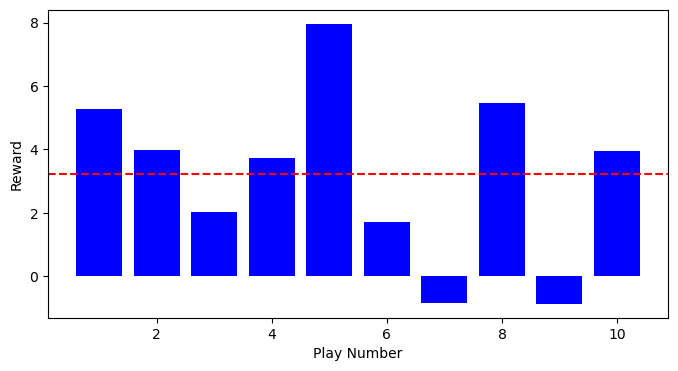

Average reward for 10 plays is 3.2353215372201234


In [4]:
import matplotlib.pyplot as plt
import random

class SixArmedBandit:
    def __init__(self):
        self.arms = {
            1: (1, 3),
            2: (-3, 8),
            3: (2, 5),
            4: (-2, 6),
            5: (3, 4),
            6: (-2, 2)
        }

    def sample_reward(self, arm):
        # Sample a reward based on the arm number from a uniform distribution
        a, b = self.arms[arm]
        return random.uniform(a, b)

    def simulate_plays(self, num_plays):
        # Simulate a number of plays, selecting arms uniformly
        rewards = [self.sample_reward(random.randint(1, 6)) for _ in range(num_plays)]
        return rewards

    def compute_average_reward(self, rewards):
        # Compute the average reward from a list of rewards 
        return sum(rewards) / len(rewards)

# Create a six-armed bandit instance
bandit = SixArmedBandit()

# Simulate 10 plays
num_plays = 10
rewards = bandit.simulate_plays(num_plays)
average_reward = bandit.compute_average_reward(rewards)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.bar(range(1, num_plays+1), rewards, color='blue')
plt.axhline(y=average_reward, color='r', linestyle='--')
#plt.title('Rewards from 10 Plays and Average Reward')
plt.xlabel('Play Number')
plt.ylabel('Reward')
plt.show()

print(f"Average reward for {num_plays} plays is {average_reward}")


Here average reward is 3.23 which is higher than expected 2.25.   
I believe it does not represent anything as we draw only 10 samples. This is not sufficent to make any conclusions.   
Plus ecah time I run this code it returns different result, which are very low sometimes. 

## Task 2.3)


In [5]:
class SixArmedBanditEpsilonGreedy(SixArmedBandit):
    def __init__(self, epsilon=0.1):
        super().__init__()
        self.epsilon = epsilon
        self.Q = {i: 0 for i in range(1, 7)}  # Action value estimates
        self.action_counts = {i: 0 for i in range(1, 7)}  # Count of actions taken per arm

    def choose_action(self):
        # Choose an action using an epsilon-greedy strategy 
        if random.random() < self.epsilon:
            # Exploration: choose a random action
            return random.randint(1, 6)
        else:
            # Exploitation: choose the best action
            max_q = max(self.Q.values())
            best_actions = [action for action, q in self.Q.items() if q == max_q]
            return random.choice(best_actions)

    def update_Q(self, action, reward):
        # Update the action-value estimate Q for the chosen action 
        self.action_counts[action] += 1
        count = self.action_counts[action]
        self.Q[action] += (reward - self.Q[action]) / count

    def simulate_actions(self, total_actions):
        # Simulate a given number of actions and report statistics every 100 actions
        rewards = []
        action_statistics = []
        for i in range(1, total_actions + 1):
            action = self.choose_action()
            reward = self.sample_reward(action)
            self.update_Q(action, reward)
            rewards.append(reward)

            if i % 100 == 0:
                avg_reward = sum(rewards[-100:]) / 100
                percentages = {
                    arm: self.action_counts[arm] / i * 100 for arm in range(1, 7)
                }
                action_statistics.append((percentages, avg_reward))

        return action_statistics

# Create a bandit with epsilon-greedy strategy
epsilon = 0.1
bandit = SixArmedBanditEpsilonGreedy(epsilon)

# Number of actions to simulate
total_actions = 4000

# Simulate actions and gather statistics
action_statistics = bandit.simulate_actions(total_actions)

# Display the requested statistics every 100 actions
for i, stats in enumerate(action_statistics, start=1):
    percentages, avg_reward = stats
    print(f"After {i*100} actions:")
    print(f"Percentage of choices per arm: {percentages}")
    print(f"Average reward: {avg_reward}\n")


After 100 actions:
Percentage of choices per arm: {1: 0.0, 2: 0.0, 3: 19.0, 4: 43.0, 5: 34.0, 6: 4.0}
Average reward: 2.796258221107174

After 200 actions:
Percentage of choices per arm: {1: 0.5, 2: 1.0, 3: 10.5, 4: 22.0, 5: 63.0, 6: 3.0}
Average reward: 3.3913157791269537

After 300 actions:
Percentage of choices per arm: {1: 1.0, 2: 1.6666666666666667, 3: 8.0, 4: 15.0, 5: 71.33333333333334, 6: 3.0}
Average reward: 3.381701327973563

After 400 actions:
Percentage of choices per arm: {1: 1.0, 2: 1.5, 3: 17.5, 4: 11.5, 5: 66.0, 6: 2.5}
Average reward: 3.3758889439530293

After 500 actions:
Percentage of choices per arm: {1: 0.8, 2: 1.2, 3: 14.399999999999999, 4: 9.6, 5: 71.6, 6: 2.4}
Average reward: 3.394152748993127

After 600 actions:
Percentage of choices per arm: {1: 1.5, 2: 1.5, 3: 12.166666666666668, 4: 8.333333333333332, 5: 74.0, 6: 2.5}
Average reward: 3.2181777494039236

After 700 actions:
Percentage of choices per arm: {1: 1.5714285714285716, 2: 1.7142857142857144, 3: 10.71428

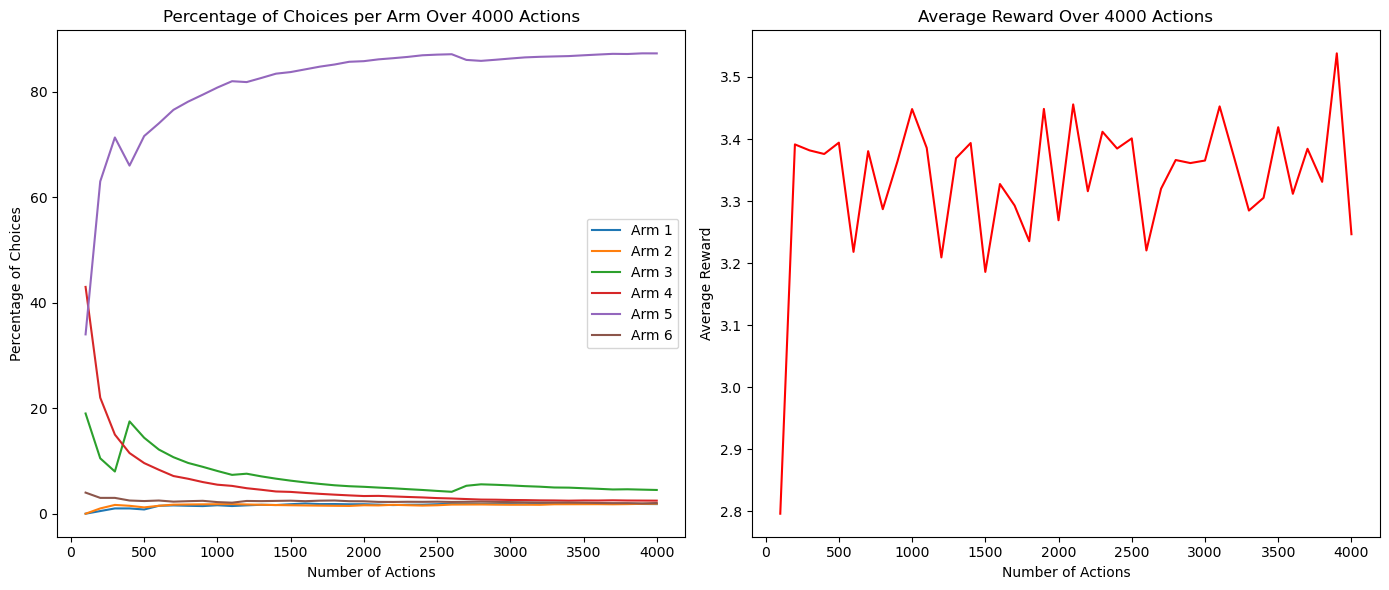

In [6]:
# data for plotting
percentages_arm1 = [stats[0][1] for stats in action_statistics]
percentages_arm2 = [stats[0][2] for stats in action_statistics]
percentages_arm3 = [stats[0][3] for stats in action_statistics]
percentages_arm4 = [stats[0][4] for stats in action_statistics]
percentages_arm5 = [stats[0][5] for stats in action_statistics]
percentages_arm6 = [stats[0][6] for stats in action_statistics]
average_rewards = [stats[1] for stats in action_statistics]
x_values = list(range(100, 4001, 100))  # Each 100 actions up to 4000

# percentage of choices per arm
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(x_values, percentages_arm1, label='Arm 1')
plt.plot(x_values, percentages_arm2, label='Arm 2')
plt.plot(x_values, percentages_arm3, label='Arm 3')
plt.plot(x_values, percentages_arm4, label='Arm 4')
plt.plot(x_values, percentages_arm5, label='Arm 5')
plt.plot(x_values, percentages_arm6, label='Arm 6')
plt.title('Percentage of Choices per Arm Over 4000 Actions')
plt.xlabel('Number of Actions')
plt.ylabel('Percentage of Choices')
plt.legend()

# average results
plt.subplot(1, 2, 2)
plt.plot(x_values, average_rewards, color='red')
plt.title('Average Reward Over 4000 Actions')
plt.xlabel('Number of Actions')
plt.ylabel('Average Reward')

plt.tight_layout()

plt.show()


We can see that Arm 5 is chosen much more often. This is due to it having high average reward.  
Arm 3 and 4 had also good start, but because Arm 5 had closer range (3,4] it most likely is giving more consistent higher reward.
We can also see that average reward got higher from inital position. 

## Task 2.4)

In [7]:
class SixArmedBanditDynamic(SixArmedBanditEpsilonGreedy):
    def __init__(self, epsilon=0.1, alpha=None):
        super().__init__(epsilon)
        self.alpha = alpha
        self.step_count = 0

    def sample_reward(self, arm):
        # Return a reward based on the arm number with changing distribution for arm 4 after 2000 steps 
        self.step_count += 1
        if arm == 4 and self.step_count > 2000:
            return random.uniform(5, 7)  # Changed distribution after 2000 steps
        else:
            return super().sample_reward(arm)

    def update_Q(self, action, reward):
        # Update the action-value estimate Q for the chosen action using either constant alpha or sample average 
        self.action_counts[action] += 1
        if self.alpha is None:  # Sample average method
            count = self.action_counts[action]
            self.Q[action] += (reward - self.Q[action]) / count
        else:  # Constant learning rate alpha
            self.Q[action] += self.alpha * (reward - self.Q[action])

# Function to run simulation and return statistics
def run_simulation(bandit, total_actions):
    rewards = []
    action_statistics = []
    for i in range(1, total_actions + 1):
        action = bandit.choose_action()
        reward = bandit.sample_reward(action)
        bandit.update_Q(action, reward)
        rewards.append(reward)

        if i % 100 == 0:
            avg_reward = sum(rewards[-100:]) / 100
            percentages = {
                arm: bandit.action_counts[arm] / i * 100 for arm in range(1, 7)
            }
            action_statistics.append((percentages, avg_reward))

    return action_statistics

# Create and run bandit simulations with both methods
bandit_sample_average = SixArmedBanditDynamic(epsilon=0.1, alpha=None)
bandit_constant_alpha = SixArmedBanditDynamic(epsilon=0.1, alpha=0.01)

total_actions = 4000
stats_sample_average = run_simulation(bandit_sample_average, total_actions)
stats_constant_alpha = run_simulation(bandit_constant_alpha, total_actions)

stats_sample_average[-1], stats_constant_alpha[-1]  # Show last statistics for comparison

(({1: 1.4749999999999999, 2: 2.15, 3: 82.15, 4: 10.025, 5: 2.175, 6: 2.025},
  5.696549327000108),
 ({1: 1.9, 2: 1.7000000000000002, 3: 1.875, 4: 1.35, 5: 91.5, 6: 1.675},
  3.535131847396526))

In [8]:
for i, stats in enumerate(stats_constant_alpha, start=1):
    percentages, avg_reward = stats
    print(f"After {i*100} actions:")
    print(f"Percentage of choices per arm: {percentages}")
    print(f"Average reward: {avg_reward}\n")

After 100 actions:
Percentage of choices per arm: {1: 1.0, 2: 0.0, 3: 1.0, 4: 0.0, 5: 96.0, 6: 2.0}
Average reward: 3.3907901216938523

After 200 actions:
Percentage of choices per arm: {1: 3.5000000000000004, 2: 1.5, 3: 2.0, 4: 0.0, 5: 91.0, 6: 2.0}
Average reward: 3.2724407798033672

After 300 actions:
Percentage of choices per arm: {1: 3.3333333333333335, 2: 1.3333333333333335, 3: 1.6666666666666667, 4: 0.33333333333333337, 5: 91.0, 6: 2.3333333333333335}
Average reward: 3.389386114335886

After 400 actions:
Percentage of choices per arm: {1: 2.75, 2: 1.25, 3: 1.25, 4: 0.75, 5: 92.0, 6: 2.0}
Average reward: 3.408820340015603

After 500 actions:
Percentage of choices per arm: {1: 2.1999999999999997, 2: 1.0, 3: 1.4000000000000001, 4: 0.8, 5: 92.80000000000001, 6: 1.7999999999999998}
Average reward: 3.448533143886726

After 600 actions:
Percentage of choices per arm: {1: 2.5, 2: 0.8333333333333334, 3: 2.3333333333333335, 4: 0.8333333333333334, 5: 91.66666666666666, 6: 1.833333333333333

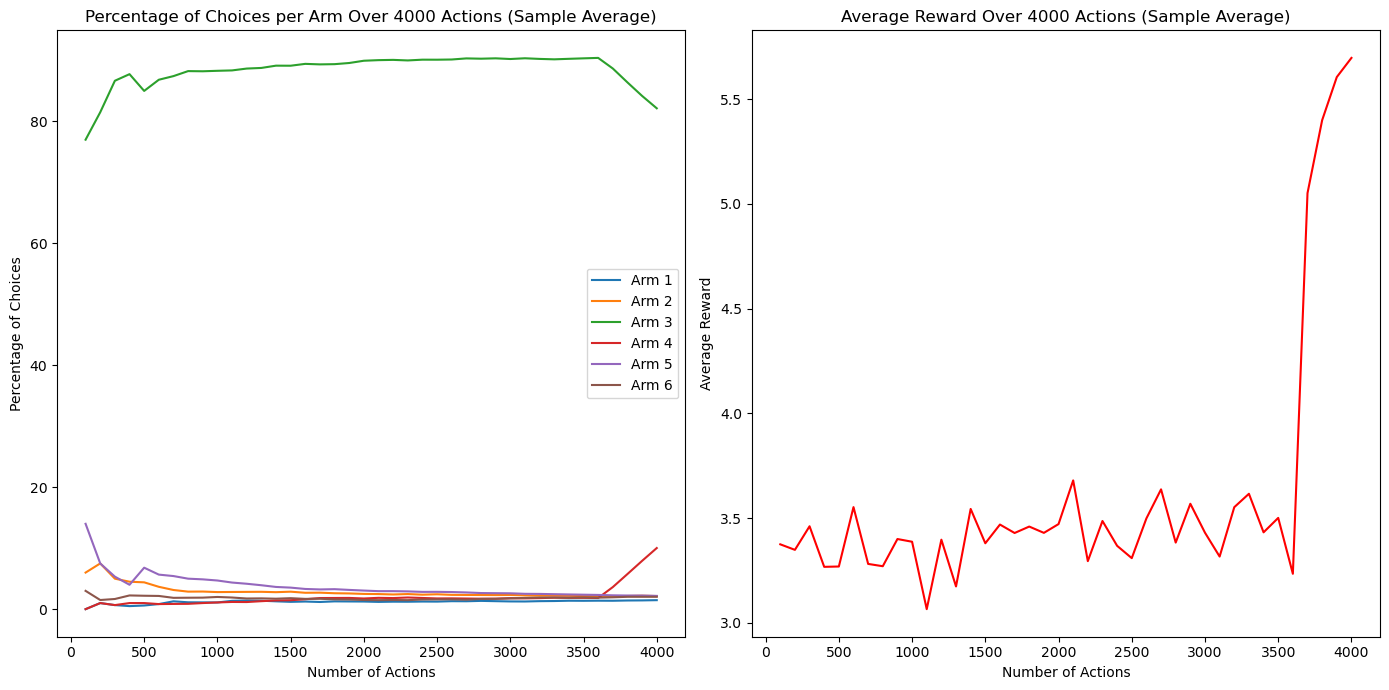

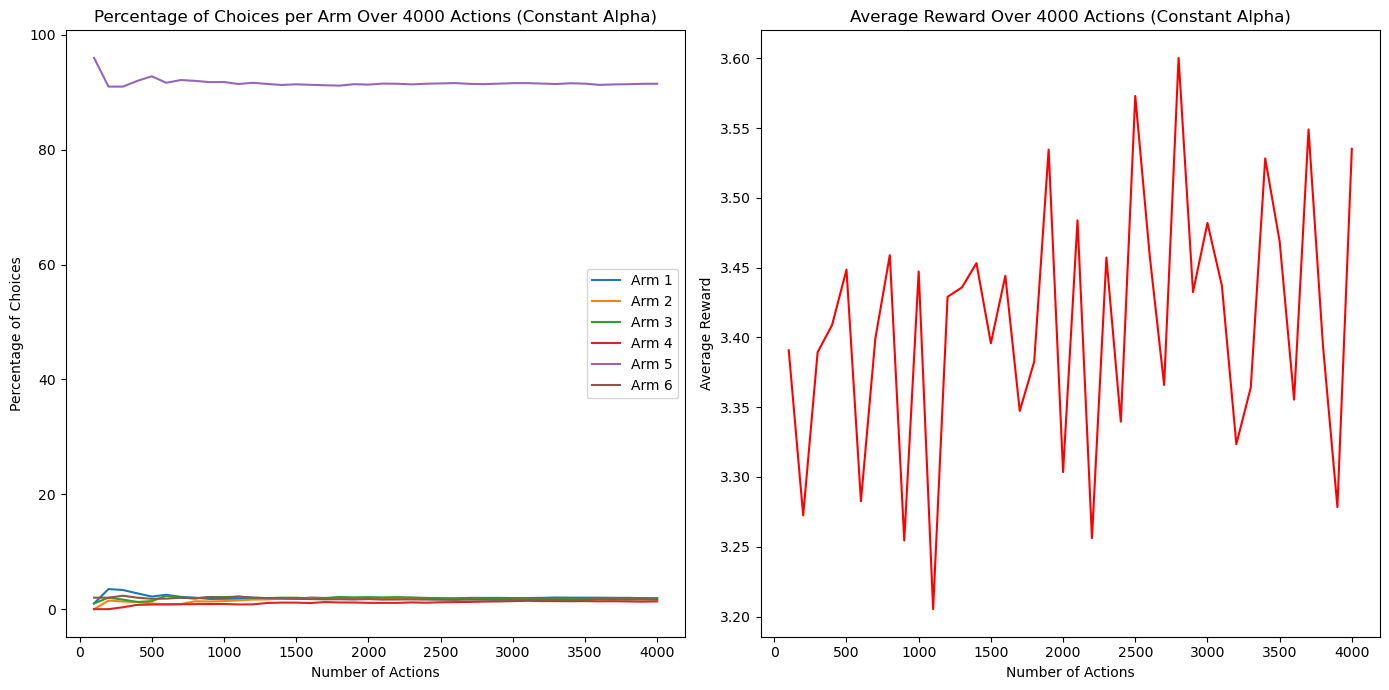

In [9]:
# Extract and plot data for both methods
def plot_stats(statistics, title_suffix):
    x_values = list(range(100, total_actions + 1, 100))
    percentages_arms = {arm: [stat[0][arm] for stat in statistics] for arm in range(1, 7)}
    average_rewards = [stat[1] for stat in statistics]

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    for arm in range(1, 7):
        plt.plot(x_values, percentages_arms[arm], label=f'Arm {arm}')
    plt.title(f'Percentage of Choices per Arm Over 4000 Actions ({title_suffix})')
    plt.xlabel('Number of Actions')
    plt.ylabel('Percentage of Choices')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x_values, average_rewards, color='red')
    plt.title(f'Average Reward Over 4000 Actions ({title_suffix})')
    plt.xlabel('Number of Actions')
    plt.ylabel('Average Reward')
    plt.tight_layout()

    plt.show()

# Plot for sample average method
plot_stats(stats_sample_average, "Sample Average")

# Plot for constant alpha method
plot_stats(stats_constant_alpha, "Constant Alpha")


In case we modify the reward distrubtuion of arm 4 there are certain observations.   
As we can see when sample averaging it reacts better to change in reward and average reward also increases  
While when it comes to constant learning rate of alpha=0.01 still reacts, it learns that the reward distribution has changed, but it reacts much slower. 

## Task 2.5)

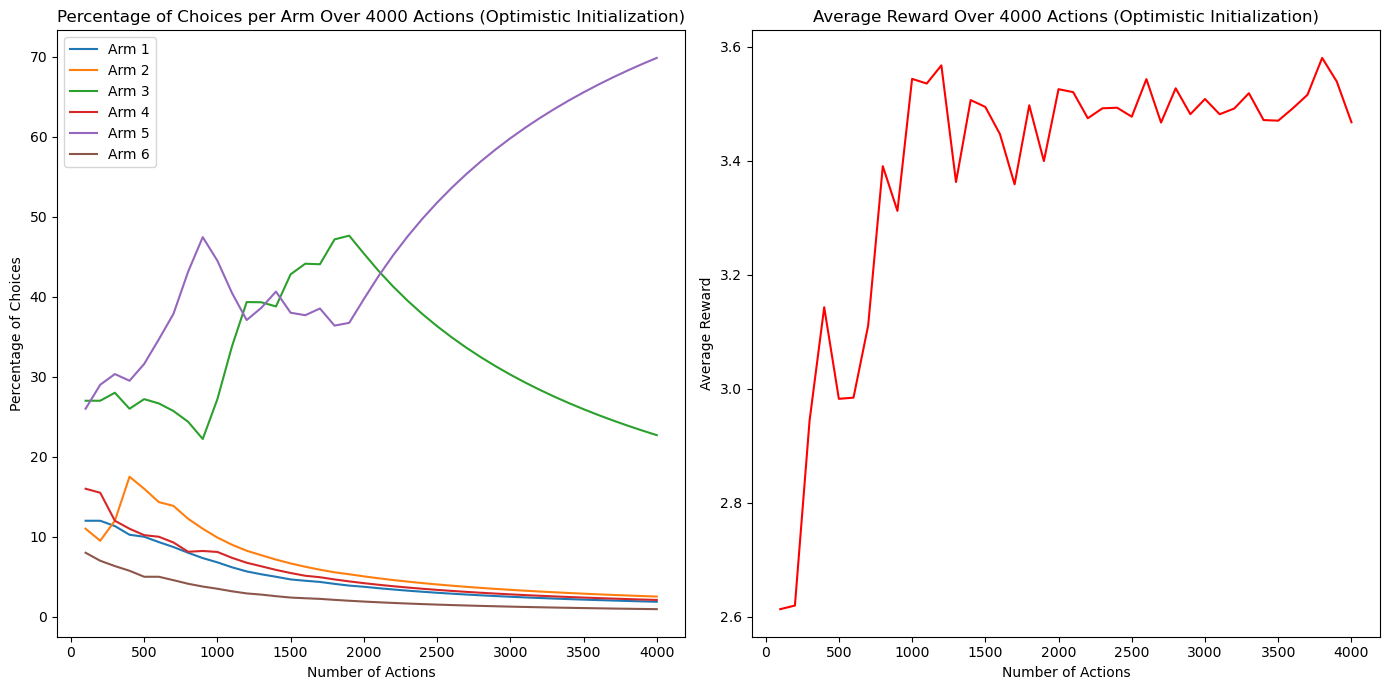

({1: 1.875, 2: 2.5250000000000004, 3: 22.7, 4: 2.1, 5: 69.85, 6: 0.95},
 3.4672062268224924)

In [10]:
class SixArmedBanditOptimistic(SixArmedBanditDynamic):
    def __init__(self, alpha=0.01, initial_Q=5):
        # Initialize with epsilon=0 for greedy selection and set Q values optimistically
        super().__init__(epsilon=0, alpha=alpha)
        self.Q = {i: initial_Q for i in range(1, 7)}  # Optimistic initial values for Q

# Create and run bandit simulations with optimistic initial values
bandit_optimistic = SixArmedBanditOptimistic()

# Run simulation for the optimistic initialization scenario
stats_optimistic = run_simulation(bandit_optimistic, total_actions)

# Plot statistics for optimistic initial values
plot_stats(stats_optimistic, "Optimistic Initialization")

# Display last statistics for comparison with previous constant alpha results
stats_optimistic[-1]


In [11]:
# Display the requested statistics every 100 actions
for i, stats in enumerate(stats_optimistic, start=1):
    percentages, avg_reward = stats
    print(f"After {i*100} actions:")
    print(f"Percentage of choices per arm: {percentages}")
    print(f"Average reward: {avg_reward}\n")

After 100 actions:
Percentage of choices per arm: {1: 12.0, 2: 11.0, 3: 27.0, 4: 16.0, 5: 26.0, 6: 8.0}
Average reward: 2.613336711885589

After 200 actions:
Percentage of choices per arm: {1: 12.0, 2: 9.5, 3: 27.0, 4: 15.5, 5: 28.999999999999996, 6: 7.000000000000001}
Average reward: 2.6196783662492664

After 300 actions:
Percentage of choices per arm: {1: 11.333333333333332, 2: 12.0, 3: 28.000000000000004, 4: 12.0, 5: 30.333333333333336, 6: 6.333333333333334}
Average reward: 2.943843188732008

After 400 actions:
Percentage of choices per arm: {1: 10.25, 2: 17.5, 3: 26.0, 4: 11.0, 5: 29.5, 6: 5.75}
Average reward: 3.142772673868621

After 500 actions:
Percentage of choices per arm: {1: 10.0, 2: 16.0, 3: 27.200000000000003, 4: 10.2, 5: 31.6, 6: 5.0}
Average reward: 2.982202560476379

After 600 actions:
Percentage of choices per arm: {1: 9.333333333333334, 2: 14.333333333333334, 3: 26.666666666666668, 4: 10.0, 5: 34.66666666666667, 6: 5.0}
Average reward: 2.9842720764558015

After 700 a

We can see that optimistic initialization approach made our model explore more at early stage, thus converging to better reward return faster than in 2.4.   
I also wanted to notice that because we choose random reward, the model acts a little different everytime I ran the code. But what is consistent is that arm 5 is exploitet quite often, and arms 3 and 4 are alternatively exploited. What I mean is sometimes arm 3 is used more often than arm 4 and vice verca. 